In [1]:
import os,io
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Downloading the file
zip_file = tf.keras.utils.get_file(
    'spa-eng.zip', origin='http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip',
    extract=True)

file_path = os.path.dirname(zip_file)+"/spa-eng/spa.txt"


2638744/2638744 [==============================] - 0s 0us/step


In [4]:
def load_data(path, size=None):
    text = io.open(file_path, encoding='UTF-8').read()
    lines = text.splitlines()
    pairs = [line.split('\t') for line in lines]

    source = np.array([source for target, source in pairs])
    target = np.array([target for target, source in pairs])

    return source, target

In [5]:
src_sentences, tgt_sentences = load_data(file_path)
print("Original Sentence:",src_sentences[42])
print("Translated Sentence:",tgt_sentences[42])

Original Sentence: Yo lo sé.
Translated Sentence: I know.


In [6]:
# Create a dataframe Visualize the data
df = pd.DataFrame(zip(src_sentences, tgt_sentences), columns=['source_sentence', 'target_sentence'])
df

,source_sentence,target_sentence
0,Ve.,Go.
1,Vete.,Go.
2,Vaya.,Go.
3,Váyase.,Go.
4,Hola.,Hi.
...,...,...
118959,Hay cuatro causas principales de muertes relac...,There are four main causes of alcohol-related ...
118960,Hay madres y padres que se quedan despiertos d...,There are mothers and fathers who will lie awa...
118961,Una huella de carbono es la cantidad de contam...,A carbon footprint is the amount of carbon dio...
118962,Como suele haber varias páginas web sobre cual...,Since there are usually multiple websites on a...


array([[<Axes: title={'center': 'english'}>,
        <Axes: title={'center': 'spanish'}>]], dtype=object)

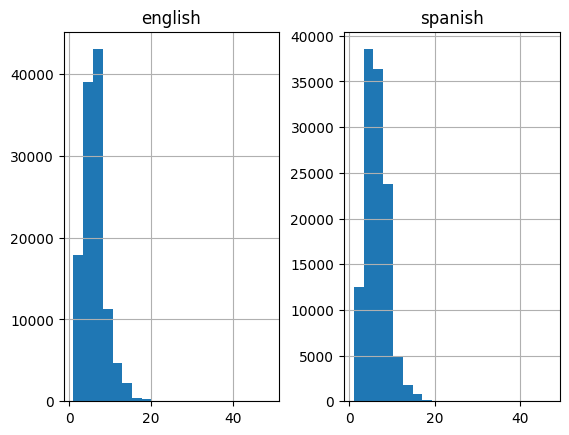

In [7]:
eng_len = []
span_len = []

# populate the lists with sentence lengths
for i in src_sentences:
      eng_len.append(len(i.split()))

for i in tgt_sentences:
      span_len.append(len(i.split()))

length_df = pd.DataFrame({'english':eng_len, 'spanish':span_len})

length_df.hist(bins = 20)


#Text Standardization

In [8]:
import re, itertools
from collections import Counter
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [9]:
import unicodedata

def unicode_to_ascii(s):
    normalized = unicodedata.normalize('NFD', s)
    return ''.join(c for c in normalized if unicodedata.category(c) != 'Mn')

def preprocess_text(text):
  text = unicode_to_ascii(text.lower().strip())
  text = re.sub(r"[^a-zA-Z?.!,¿]+", " ", text)
  text = re.sub(r"([?.!,¿])", r" \1 ", text)
  text = re.sub(r'[" "]+', " ", text)
  text = text.rstrip().strip()
  text = '<sos> ' + text + ' <eos>'
  return text


In [10]:
print('Original sentence:',src_sentences[42])
prc_src_sentences = [preprocess_text(w) for w in src_sentences]
prc_tgt_sentences = [preprocess_text(w) for w in tgt_sentences]
print('Preprocessed sentence:',prc_src_sentences[42])

Original sentence: Yo lo sé.
Preprocessed sentence: <sos> yo lo se . <eos>


In [11]:
# Tokenizer class from the tensorflow.keras.preprocessing.text module.

def tokenize(sentences):
    lang_tokenizer = Tokenizer( filters='')
    lang_tokenizer.fit_on_texts(sentences)
    sequences = lang_tokenizer.texts_to_sequences(sentences)
    max_length = max(len(s) for s in sequences)
    sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

    return sequences, lang_tokenizer, max_length


In [12]:
#Create source and target sequences using tokenize

def load_sequences(path, size=None):
    src_sentences, tgt_sentences = load_data(path)
    src_sentences = [preprocess_text(w) for w in src_sentences]
    tgt_sentences = [preprocess_text(w) for w in tgt_sentences]

    src_sequences,src_lang_tokenizer,max_length_src = tokenize(src_sentences)
    tgt_sequences,tgt_lang_tokenizer,max_length_trg = tokenize(tgt_sentences)

    return src_sequences, tgt_sequences, src_lang_tokenizer, tgt_lang_tokenizer, max_length_src, max_length_trg

In [13]:
src_sequences, tgt_sequences, src_lang_tokenizer, tgt_lang_tokenizer, max_length_src, max_length_trg = load_sequences(file_path)
print("src sequences:",src_sequences.shape)
print("tgt sequences:",tgt_sequences.shape)
print("source maxlen:",max_length_src)
print("target maxlen:",max_length_trg)

src sequences: (118964, 53)
tgt sequences: (118964, 51)
source maxlen: 53
target maxlen: 51


In [14]:
print("Original sentence:", src_sentences[42])
print("Text after preprocessing:", preprocess_text(src_sentences[42]))
print("Text after tokenization :", src_sequences[42])

Original sentence: Yo lo sé.
Text after preprocessing: <sos> yo lo se . <eos>
Text after tokenization : [ 1 38 21 16  3  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0]


In [15]:
print("Original sentence:", tgt_sentences[42])
print("Text after preprocessing:", preprocess_text(tgt_sentences[42]))
print("Text after tokenization :", tgt_sequences[42])

Original sentence: I know.
Text after preprocessing: <sos> i know . <eos>
Text after tokenization : [ 1  4 45  3  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0]


In [16]:
#Testing if the word to index / index to word mappings have been obtained correctly.
def convert(lang, tensor):
  for t in tensor:
    if t!=0:
      print ("%d ----> %s" % (t, lang.index_word[t]))

print ("Input Language; index to word mapping")
convert(src_lang_tokenizer, src_sequences[42])
print ()
print ("Target Language; index to word mapping")
convert(tgt_lang_tokenizer, tgt_sequences[42])

Input Language; index to word mapping
1 ----> <sos>
38 ----> yo
21 ----> lo
16 ----> se
3 ----> .
2 ----> <eos>

Target Language; index to word mapping
1 ----> <sos>
4 ----> i
45 ----> know
3 ----> .
2 ----> <eos>


In [17]:
# getting the size of the input and output vocabularies.

src_vocab_size = len(src_lang_tokenizer.word_index)+1
tgt_vocab_size = len(tgt_lang_tokenizer.word_index)+1
print(src_vocab_size)
print(tgt_vocab_size)

24794
12934


In [18]:
# Train-Test Split
source_sequences_train,source_sequences_val,tgt_sequences_train,tgt_sequences_val = train_test_split(src_sequences, tgt_sequences, shuffle=False, test_size=0.2)
print(len(source_sequences_train),len(source_sequences_val),len(tgt_sequences_train),len(tgt_sequences_val))

95171 23793 95171 23793


In [19]:
#Defining hyperparameters
buffer_size=len(source_sequences_train)
val_buffer_size = len(source_sequences_val)
BATCH_SIZE = 64
embedding_dim = 128
units = 600
steps_per_epoch = buffer_size//BATCH_SIZE
val_steps_per_epoch = val_buffer_size//BATCH_SIZE

In [20]:
train_dataset = tf.data.Dataset.from_tensor_slices((source_sequences_train, tgt_sequences_train))

train_dataset = train_dataset.shuffle(buffer_size=buffer_size).batch(BATCH_SIZE)

val_dataset = tf.data.Dataset.from_tensor_slices((source_sequences_val, tgt_sequences_val))

val_dataset = val_dataset.batch(BATCH_SIZE)

In [21]:
example_input_batch, example_target_batch = next(iter(train_dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([64, 53]), TensorShape([64, 51]))

# Build the NMT model(Encoder-Decoder model with attention)

In [22]:
class Encoder(tf.keras.Model):

    def __init__(self, vocab_size, emb_dim, enc_units, batch_sz):
        super(Encoder, self).__init__()
        self.enc_units = enc_units
        self.batch_sz = batch_sz
        self.embedding = tf.keras.layers.Embedding(vocab_size, emb_dim,mask_zero=True)
        self.gru = tf.keras.layers.GRU(self.enc_units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_initializer='glorot_uniform')

    def call(self, x, hidden):
        x = self.embedding(x)
        output, state = self.gru(x, initial_state = hidden)
        return output, state

    def initialize_hidden_state(self):
        return tf.zeros((self.batch_sz, self.enc_units))

In [23]:
encoder = Encoder(src_vocab_size, embedding_dim, units, BATCH_SIZE)

sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

Encoder output shape: (batch size, sequence length, units) (64, 53, 600)
Encoder Hidden state shape: (batch size, units) (64, 600)


In [24]:
# class implements the Bahdanau Attention mechanism in TensorFlow as a custom layer
class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units) # fully-connected dense layer-1
    self.W2 = tf.keras.layers.Dense(units) # fully-connected dense layer-2
    self.V = tf.keras.layers.Dense(1) # fully-connected dense layer-3

  def call(self, query, values):

    query_with_time_axis = tf.expand_dims(query, 1)
    score = self.V(tf.nn.tanh(self.W1(query_with_time_axis) + self.W2(values)))
    attention_weights = tf.nn.softmax(score, axis=1)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [25]:
attention_layer = BahdanauAttention(20)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape (context vector): (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape (context vector): (batch size, units) (64, 600)
Attention weights shape: (batch_size, sequence_length, 1) (64, 53, 1)


In [26]:
class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, emb_dim, dec_units, batch_sz):
    super(Decoder, self).__init__()
    self.batch_sz = batch_sz
    self.dec_units = dec_units
    self.attention = BahdanauAttention(self.dec_units)

    self.embedding = tf.keras.layers.Embedding(vocab_size, emb_dim)

    self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc = tf.keras.layers.Dense(vocab_size)

  def call(self, x, hidden, enc_output):
    context_vector, attention_weights = self.attention(hidden, enc_output)
    x = self.embedding(x)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)
    output, state = self.gru(x)
    output = tf.reshape(output, (-1, output.shape[2]))
    x = self.fc(output)
    return x, state , attention_weights

In [27]:
decoder = Decoder(tgt_vocab_size, embedding_dim, units, BATCH_SIZE)
sample_decoder_output, _, _ = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                      sample_hidden, sample_output)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (64, 12934)


## Train the NMT model

In [28]:
optimizer = tf.keras.optimizers.Adam()

loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')



def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)


checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

In [29]:
@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_output, enc_hidden = encoder(inp, enc_hidden)

    dec_hidden = enc_hidden

    dec_input = tf.expand_dims([tgt_lang_tokenizer.word_index['<sos>']] * BATCH_SIZE, 1)

    for t in range(1, targ.shape[1]):
      predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

      loss += loss_function(targ[:, t], predictions)

      dec_input = tf.expand_dims(targ[:, t], 1)

  batch_loss = (loss / int(targ.shape[1]))

  variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, variables)
  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

In [30]:
@tf.function
def val_step(inp, targ, enc_hidden):
    loss = 0
    enc_output, enc_hidden = encoder(inp, enc_hidden)
    dec_hidden = enc_hidden
    dec_input =  tf.expand_dims([tgt_lang_tokenizer.word_index['<sos>']] * BATCH_SIZE, 1)

    for t in range(1, targ.shape[1]):
        predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)
        loss += loss_function(targ[:, t], predictions)
        dec_input = tf.expand_dims(targ[:, t], 1)

    batch_loss = (loss / int(targ.shape[1]))

    return batch_loss

In [31]:
import time

def train_and_validate(train_dataset, val_dataset, EPOCHS=4):
    for epoch in range(EPOCHS):
        start = time.time()

        #Step1:
        enc_hidden = encoder.initialize_hidden_state()
        total_train_loss = 0
        total_val_loss = 0
        for (batch, (inp, targ)) in enumerate(train_dataset.take(steps_per_epoch)):
            batch_loss = train_step(inp, targ, enc_hidden)
            total_train_loss += batch_loss

            if batch % 100 == 0:
                print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                            batch,
                                                            batch_loss.numpy()))

        for (batch, (inp, targ)) in enumerate(val_dataset.take(val_steps_per_epoch)):
            val_batch_loss = val_step(inp, targ, enc_hidden)
            total_val_loss += val_batch_loss

        if (epoch + 1) % 2 == 0:
            checkpoint.save(file_prefix = checkpoint_prefix)

        print('Total training loss is {:.4f}'.format(total_train_loss / steps_per_epoch))
        print('Total validation loss is {:.4f}'.format( total_val_loss / val_steps_per_epoch))
        print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

In [32]:
train_and_validate(train_dataset, val_dataset)

Epoch 1 Batch 0 Loss 1.4184
Epoch 1 Batch 100 Loss 0.7478
Epoch 1 Batch 200 Loss 0.6220
Epoch 1 Batch 300 Loss 0.6204
Epoch 1 Batch 400 Loss 0.5681
Epoch 1 Batch 500 Loss 0.5770
Epoch 1 Batch 600 Loss 0.6121
Epoch 1 Batch 700 Loss 0.6104
Epoch 1 Batch 800 Loss 0.5415
Epoch 1 Batch 900 Loss 0.5447
Epoch 1 Batch 1000 Loss 0.5733
Epoch 1 Batch 1100 Loss 0.4977
Epoch 1 Batch 1200 Loss 0.5077
Epoch 1 Batch 1300 Loss 0.4750
Epoch 1 Batch 1400 Loss 0.4912
Total training loss is 0.5870
Total validation loss is 1.0701
Time taken for 1 epoch 564.0721137523651 sec

Epoch 2 Batch 0 Loss 0.4578
Epoch 2 Batch 100 Loss 0.4739
Epoch 2 Batch 200 Loss 0.4368
Epoch 2 Batch 300 Loss 0.4392
Epoch 2 Batch 400 Loss 0.4148
Epoch 2 Batch 500 Loss 0.3919
Epoch 2 Batch 600 Loss 0.4373
Epoch 2 Batch 700 Loss 0.3594
Epoch 2 Batch 800 Loss 0.4124
Epoch 2 Batch 900 Loss 0.3427
Epoch 2 Batch 1000 Loss 0.3070
Epoch 2 Batch 1100 Loss 0.3254
Epoch 2 Batch 1200 Loss 0.3367
Epoch 2 Batch 1300 Loss 0.3159
Epoch 2 Batch 140

In [33]:
# def plot_attention(attention, sentence, predicted_sentence):
#   fig = plt.figure(figsize=(10, 10))
#   ax = fig.add_subplot(1, 1, 1)
#   ax.matshow(attention, cmap='viridis')
#   fontdict = {'fontsize': 14}
#   ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
#   ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)
#   ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
#   ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
#   plt.show()

In [48]:
def evaluate(sentence):
    attention_plot = np.zeros((max_length_trg, max_length_src))
    sentence = preprocess_text(sentence)
    inputs = [src_lang_tokenizer.word_index[i] for i in sentence.split(' ')]
    inputs = pad_sequences([inputs],
                          maxlen=max_length_src,
                          padding='post')
    inputs = tf.convert_to_tensor(inputs)

    result = ''
    hidden = [tf.zeros((1, units))]
    enc_out, enc_hidden = encoder(inputs, hidden)
    dec_hidden = enc_hidden
    dec_input = tf.expand_dims([tgt_lang_tokenizer.word_index['<sos>']], 0)

    for t in range(max_length_trg):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                         dec_hidden,
                                                         enc_out)
        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention_plot[t] = attention_weights.numpy()
        predicted_id = tf.argmax(predictions[0]).numpy()
        result += tgt_lang_tokenizer.index_word[predicted_id] + ' '

        if tgt_lang_tokenizer.index_word[predicted_id] == '<eos>':
            return result, sentence, attention_plot
        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence, attention_plot

In [49]:
def translate(sentence):
  result, sentence, attention_plot = evaluate(sentence)

  print('Input:', sentence)
  print('Predicted Translation:', "\033[92m{}\033[0m".format(result))


In [50]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

In [51]:
translate(u'¿todavía están en casa?')

Input: <sos> ¿ todavia estan en casa ? <eos>
Predicted Translation: are you still at home ? <eos> 


In [52]:
translate(u'hace mucho frío aquí.')

Input: <sos> hace mucho frio aqui . <eos>
Predicted Translation: it s very cold here . <eos> 
